## Keras -- MLPs on MNIST

In [ ]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [ ]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [ ]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [ ]:
# An example data point
#print(X_train[0])

In [ ]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [ ]:
# example data point after normlizing
#print(X_train[0])

In [ ]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [ ]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [ ]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 256 
nb_epoch = 20

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [ ]:
# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(392, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                3930      
Total params: 311,650
Trainable params: 311,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_relu.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.3565 - acc: 0.9005 - val_loss: 0.1791 - val_acc: 0.9494
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1479 - acc: 0.9585 - val_loss: 0.1226 - val_acc: 0.9649
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1029 - acc: 0.9707 - val_loss: 0.0947 - val_acc: 0.9724
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0761 - acc: 0.9787 - val_loss: 0.0827 - val_acc: 0.9748
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0599 - acc: 0.9833 - val_loss: 0.0759 - val_acc: 0.9773
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0465 - acc: 0.9875 - val_loss: 0.0676 - val_acc: 0.9787
Epoch 7/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0372 - acc: 0.9902 - val_loss: 0.0667 - val_acc

Test score: 0.06567277045068477
Test accuracy: 0.9823


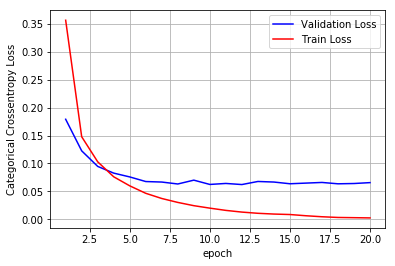

In [ ]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>MLP + Sigmoid activation + ADAM </h2>

In [ ]:
# Multilayer perceptron
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model_relu.add(Dropout(1-0.5))
model_relu.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(1-0.5))
model_relu.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
___________________________

Test score: 0.05784901397716894
Test accuracy: 0.9846


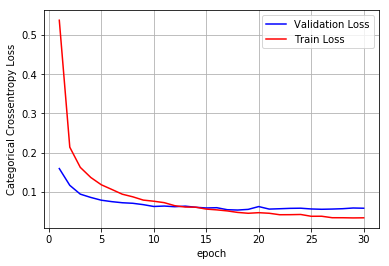

In [ ]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_relu.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_relu.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_relu.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.4630 - acc: 0.8607 - val_loss: 0.1892 - val_acc: 0.9429
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1623 - acc: 0.9524 - val_loss: 0.1297 - val_acc: 0.9601
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1189 - acc: 0.9641 - val_loss: 0.1239 - val_acc: 0.9613
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0956 - acc: 0.9718 - val_loss: 0.1006 - val_acc: 0.9685
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0754 - acc: 0.9769 - val_loss: 0.1035 - val_acc: 0.9695
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0662 - acc: 0.9796 - val_loss: 0.1015 - val_acc: 0.9692
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0573 - acc: 0.9819 - val_loss: 0.0941 - val_acc

Test score: 0.14065807280830805
Test accuracy: 0.969


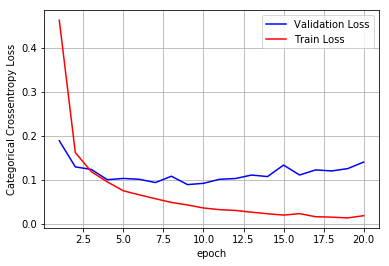

In [ ]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)